# Lab 12
## Isaac Liu

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt


### 1.

 ### (a) Write the Markov process as a matrix representation

$P_{ij}=\left(\begin{array}{ccc}
0.2 & 0.7 & 0.1\\
0.2 & 0.5 & 0.3\\
0.2 & 0.4 & 0.4
\end{array}\right)$

In [2]:
P = np.array([[0.2, 0.7, 0.1],
              [0.2, 0.5, 0.3],
              [0.2, 0.4, 0.4]])


### (b) Simulate one realization of the process starting from $X_0 = 1$, updating X according to the probabilities.

In [3]:
step_one_probs = np.array([1, 0, 0]) @ P
print('probabilities of each state after step 1')
print(np.array([1, 0, 0]) @ P)

# Draw from this distribution to realize the process
print('state drawn from running one step')
# Set seed
np.random.seed(201)
uniform_draw = np.random.uniform()
if uniform_draw <= step_one_probs[0]:
    print('State 1, X_1 = 1')
elif uniform_draw <= step_one_probs[0] + step_one_probs[1]:
    print('State 2, X_1 = 2')
else:
    print('State 3, X_1 = 3')


probabilities of each state after step 1
[0.2 0.7 0.1]
state drawn from running one step
State 1, X_1 = 1


## 2. Stationary Distribution

### (a) Compute stationary distribution. Find eigenvector with eigenvalue 1 of matrix P transpose.

In [4]:
# Find eigenvectors and eigenvalues
eigvals, eigvecs = np.linalg.eig(P.T)
print(eigvals)
print(eigvecs)

# First eigenvector - column 0
# We need to normalize it so that it sums to 1 - as otherwise any scalar multiple could satisfy the equation
stationary_dist = eigvecs[:, 0] / np.sum(eigvecs[:, 0])
print('stationary distribution:')
print(stationary_dist)


[ 1.0000000e+00 -3.6140242e-17  1.0000000e-01]
[[ 3.22458464e-01  2.67261242e-01 -1.12081322e-16]
 [ 8.24060518e-01 -8.01783726e-01 -7.07106781e-01]
 [ 4.65773337e-01  5.34522484e-01  7.07106781e-01]]
stationary distribution:
[0.2        0.51111111 0.28888889]


### (b) From $\pi_0$, compute the probability distribution at time i and plot i versus $||\pi_i - \pi_{\infty}||$. Generate the plot for two initial conditions $\pi_0$ and compare.

differences
[0.9846913580246913, 0.07135802469135805, 0.0007135802469135853, 7.135802469136188e-06, 7.135802469137027e-08, 7.135802469145415e-10, 7.135802469103473e-12, 7.135802469313183e-14, 7.135802496575325e-16, 7.135802811138523e-18, 7.135803649974046e-20]
[0.3624691358024692, 0.00024691358024691185, 2.469135802468921e-06, 2.4691358024669475e-08, 2.469135802452144e-10, 2.4691358023781294e-12, 2.469135801514623e-14, 2.469135803981785e-16, 2.469135717631109e-18, 2.4691349774829532e-20, 2.469123875312802e-22]


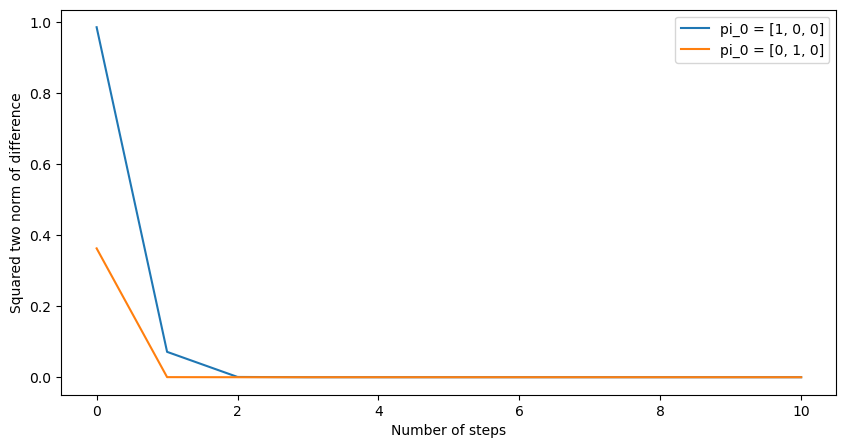

In [5]:
# Initial conditions
pi_0_1 = np.array([1, 0, 0])
pi_0_2 = np.array([0, 1, 0])

# Number of steps
num_steps = 10

# Simulate the Markov chain
# Compute squared two norm of difference between simulated and stationary distribution
pi_1s = [pi_0_1]
pi_2s = [pi_0_2]
differences_1 = [np.linalg.norm(pi_1s[-1] - stationary_dist)**2]
differences_2 = [np.linalg.norm(pi_2s[-1] - stationary_dist)**2]
for _ in range(num_steps):
    pi_1s.append(pi_1s[-1] @ P)
    pi_2s.append(pi_2s[-1] @ P)
    differences_1.append(np.linalg.norm(pi_1s[-1] - stationary_dist)**2)
    differences_2.append(np.linalg.norm(pi_2s[-1] - stationary_dist)**2)

print('differences')
print(differences_1)
print(differences_2)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(differences_1, label='pi_0 = [1, 0, 0]')
plt.plot(differences_2, label='pi_0 = [0, 1, 0]')
plt.xlabel('Number of steps')
plt.ylabel('Squared two norm of difference')
plt.legend()
plt.show()


## 3. Let node 3 be an absorbing state and we want to estimate waiting time until the process arrives at node 3 from any other node.

$P_{ij}=\left(\begin{array}{ccc}
0.2 & 0.7 & 0.1\\
0.2 & 0.5 & 0.3\\
0 & 0 & 1
\end{array}\right)$

In [6]:
# Modified matrix
# Last row is two zeroes then a one for the absorbing state
P = np.array([[0.2, 0.7, 0.1],
              [0.2, 0.5, 0.3],
              [0,   0,   1]])
              

### (a) Starting from $X_0 = 1$, $X_0 = 2$, run the simulation of the markov chains until $X_i = 3$ and store the arrival time until this happens. Make a histogram for the arrival times and compute the means.

In [7]:
# Number of simulations
n_sim = 100000

# Initial conditions
current_state_1 = 1
current_state_2 = 2

# Storing states
states_1 = []
states_2 = []

# Storing arrival times
arrival_times_1 = np.zeros(n_sim)
arrival_times_2 = np.zeros(n_sim)


In [8]:
# Loop over simulations from initial state 1
# Set seed
np.random.seed(201)
# Run simulations
for sim_number in range(n_sim):
    current_state_1 = 1
    states_path = [current_state_1]
    # Run chain starting at 1
    while current_state_1 != 3:
        # Draw a uniform random number
        u = np.random.rand()
        # Move to next state
        if u < P[current_state_1 - 1, 0]:
            current_state_1 = 1
            states_path.append(current_state_1)
        elif u < P[current_state_1 - 1, 0] + P[current_state_1 - 1, 1]:
            current_state_1 = 2
            states_path.append(current_state_1)
        else:
            current_state_1 = 3
            states_path.append(current_state_1)
        # Increment arrival time
        arrival_times_1[sim_number] += 1
    # Store states
    states_1.append(states_path)


In [9]:
# Loop over simulations from initial state 2
for sim_number in range(n_sim):
    current_state_2 = 2
    states_path = [current_state_2]
    # Run chain starting at 2
    while current_state_2 != 3:
        # Draw a uniform random number
        u = np.random.rand()
        # Move to next state
        if u < P[current_state_2 - 1, 0]:
            current_state_2 = 1
            states_path.append(current_state_2)
        elif u < P[current_state_2 - 1, 0] + P[current_state_2 - 1, 1]:
            current_state_2 = 2
            states_path.append(current_state_2)
        else:
            current_state_2 = 3
            states_path.append(current_state_2)
        # Increment arrival time
        arrival_times_2[sim_number] += 1
    # Store states
    states_2.append(states_path)


In [10]:
# Check states
print(states_1[:100])
print(states_2[:100])


[[1, 1, 2, 2, 3], [1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 3], [1, 1, 2, 3], [1, 2, 2, 3], [1, 2, 2, 3], [1, 2, 1, 2, 3], [1, 2, 2, 2, 2, 3], [1, 1, 1, 1, 2, 3], [1, 2, 1, 2, 2, 3], [1, 1, 3], [1, 2, 3], [1, 2, 2, 2, 3], [1, 1, 2, 3], [1, 2, 1, 3], [1, 2, 2, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 2, 2, 3], [1, 2, 2, 1, 2, 3], [1, 2, 1, 2, 1, 2, 1, 1, 2, 3], [1, 1, 2, 2, 1, 3], [1, 2, 3], [1, 1, 2, 2, 3], [1, 2, 2, 2, 3], [1, 1, 2, 2, 2, 3], [1, 2, 2, 1, 2, 3], [1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 3], [1, 1, 2, 2, 2, 2, 2, 3], [1, 1, 2, 3], [1, 2, 3], [1, 2, 2, 2, 3], [1, 2, 2, 3], [1, 1, 1, 2, 3], [1, 2, 2, 2, 1, 2, 3], [1, 2, 2, 3], [1, 2, 3], [1, 2, 2, 3], [1, 2, 1, 2, 3], [1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 3], [1, 1, 3], [1, 2, 2, 2, 2, 1, 2, 1, 3], [1, 2, 3], [1, 1, 2, 1, 1, 2, 2, 2, 3], [1, 2, 3], [1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3], [1, 2, 2, 2, 3], [1, 2, 1, 2, 2, 2, 2, 1, 1, 3], [1, 2, 2, 2, 1, 1, 3], [1, 2, 3], [1, 2, 1, 2, 1, 2, 3], [1, 2, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 2, 3], [1,

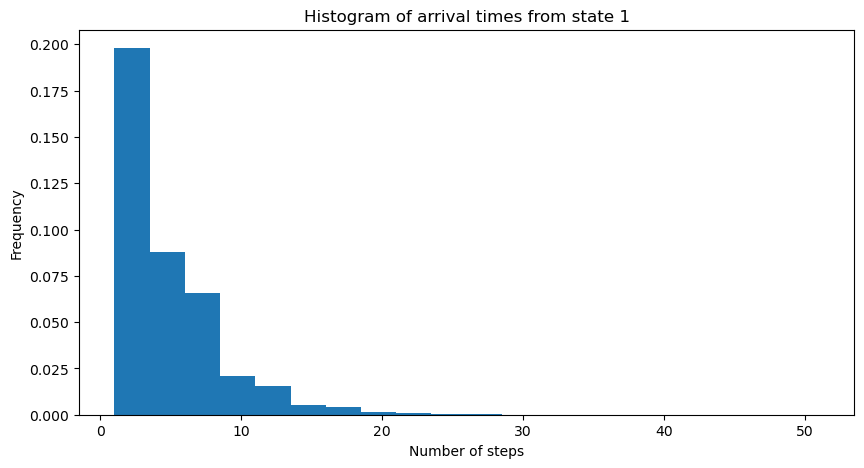

In [11]:
# Histogram of arrival_times_1
plt.figure(figsize=(10, 5))
plt.hist(arrival_times_1, bins=20, density=True)
plt.xlabel('Number of steps')
plt.ylabel('Frequency')
plt.title('Histogram of arrival times from state 1')
plt.show()


In [12]:
# Mean of arrival times from state 1
print('Mean of arrival times from state 1')
print(np.mean(arrival_times_1))


Mean of arrival times from state 1
4.61326


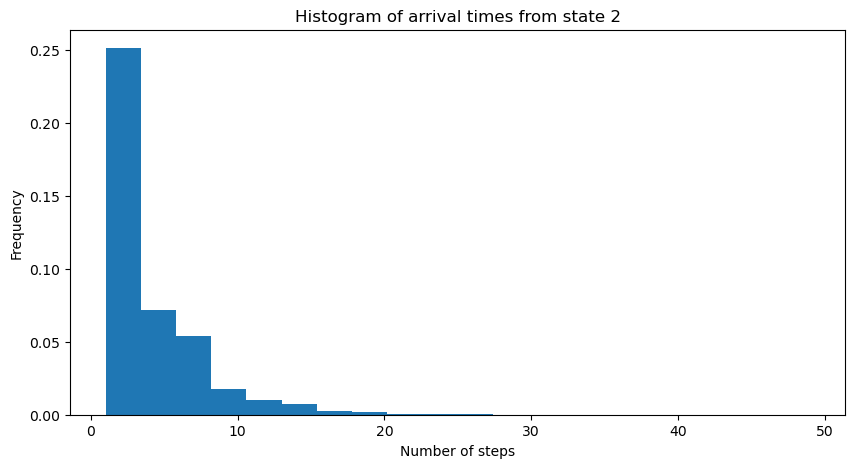

In [13]:
# Histogram of arrival_times_2
plt.figure(figsize=(10, 5))
plt.hist(arrival_times_2, bins=20, density=True)
plt.xlabel('Number of steps')
plt.ylabel('Frequency')
plt.title('Histogram of arrival times from state 2')
plt.show()


In [14]:
print('Mean of arrival times from state 2')
print(np.mean(arrival_times_2))


Mean of arrival times from state 2
3.8314


### (b) Solve for the mean arrival time theoretically.

Note that if $T_{i}$ denotes the random variable associated with the arrival time starting from $X_{0}=i$ then $\mu_{i}=1+\sum_{j=1}^{3}p_{ij}\mu_{j}$, with $\mu_{i}=E[T_{i}]$. This is a linear system. Notice that $T_{3}=0$.

We have

$$
\mu_{1}=1+\sum_{j=1}^{3}p_{1j}\mu_{j}=1+p_{11}\mu_{1}+p_{12}\mu_{2}+p_{13}\mu_{3}
$$

$$
\mu_{2}=1+\sum_{j=1}^{3}p_{2j}\mu_{j}=1+p_{21}\mu_{1}+p_{22}\mu_{2}+p_{23}\mu_{3}
$$

And note since $T_{3}=0, \mu_{3}=E(T_{3})=0$

Then

$$
\mu_{1}=1+p_{11}\mu_{1}+p_{12}\mu_{2}
$$

$$
\mu_{2}=1+p_{21}\mu_{1}+p_{22}\mu_{2}
$$

In the first equation

$$
\mu_{1}(1-p_{11})=1+p_{12}\mu_{2}
$$

$$
\mu_{1}=\frac{1+p_{12}\mu_{2}}{1-p_{11}}
$$

$$
\mu_{2}=1+p_{21}(\frac{1+p_{12}\mu_{2}}{1-p_{11}})+p_{22}\mu_{2}

=1+\frac{p_{21}}{1-p_{11}}+\frac{p_{21}p_{12}\mu_{2}}{1-p_{11}}+p_{22}\mu_{2}
$$

$$
\mu_{2}(1-\frac{p_{21}p_{12}}{1-p_{11}}-p_{22})=1+\frac{p_{21}}{1-p_{11}}
$$

$$
\mu_{2}=\frac{1+\frac{p_{21}}{1-p_{11}}}{1-\frac{p_{21}p_{12}}{1-p_{11}}-p_{22}}
$$

$$
\mu_{1}=\frac{1+p_{12}(\frac{1+\frac{p_{21}}{1-p_{11}}}{1-\frac{p_{21}p_{12}}{1-p_{11}}-p_{22}})}{1-p_{11}}
$$

In [20]:
# Plug in values
# Subtract 1 from each index!
p_11 = P[1 - 1, 1 - 1]
p_12 = P[1 - 1, 2 - 1]
p_21 = P[2 - 1, 1 - 1]
p_22 = P[2 - 1, 2 - 1]

print('p_11')
print(p_11)
print('p_12')
print(p_12)
print('p_21')
print(p_21)
print('p_22')
print(p_22)

mu_1 = ((1 + (p_12 * ((1 + (p_21 / (1 - p_11))) / (1 - ((p_21 * p_12) / (1 - p_11)) - p_22)))) / (1 - p_11))
print('mu_1')
print(mu_1)

mu_2 = ((1 + (p_21 / (1 - p_11))) / (1 - ((p_21 * p_12) / (1 - p_11)) - p_22))
print('mu_2')
print(mu_2)


p_11
0.2
p_12
0.7
p_21
0.2
p_22
0.5
mu_1
4.615384615384614
mu_2
3.8461538461538454


In [15]:
# Checking with sympy
from sympy import *
from sympy.solvers.solveset import linsolve

mu_1, mu_2 = symbols('mu_1, mu_2')
linsolve([1 + (0.2 * mu_1) + (0.7 * mu_2) - mu_1, 1 + (0.2 * mu_1) + (0.5 * mu_2) - mu_2], (mu_1, mu_2))


{(4.61538461538462, 3.84615384615385)}